# Playing with the Quantum World

### Importing the libraries
- qiskit: Creation of circuit, simulation and transpile the circuit
- qiskit_ibm_provider: to interface with the real quantum computer
- job_monitor: to monitor the status of quantum circuit being ran in real computer

In [1]:
# Libraries for creation of circuits and simulation
from qiskit import QuantumCircuit, BasicAer, transpile
from qiskit.tools.visualization import plot_histogram
from pprint import pprint

In [2]:
# Libraries for running over the real quantum computer
from qiskit_ibm_provider import IBMProvider
from qiskit.tools.monitor import job_monitor

### Creating a simple circuit

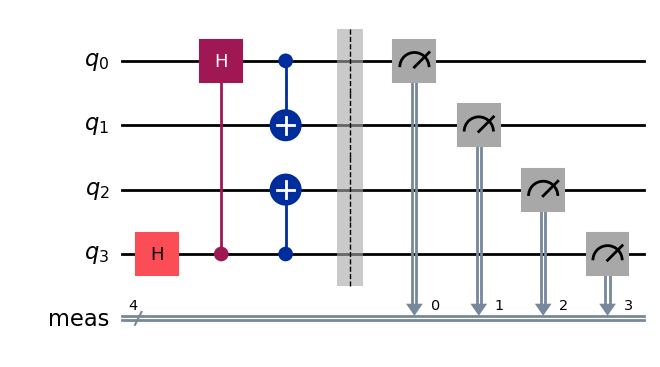

In [24]:
# creating the circuit
circuit = QuantumCircuit(4) # some qubits

# plan:
# default, all qubits are zero
# hardamard the MSQ (most significant qubit), to put into superposition
# conditionally hadamard the LSQ based on the MSQ
# remaining Qubits are C-NOTed by the supersitioned bits
# measure the state at last
circuit.h(3) 
circuit.ch(3, 0) 
circuit.cx(0, 1) 
circuit.cx(3, 2)
circuit.measure_all()

# draw the circuit
circuit.draw(output='mpl', style='iqp', filename='quantum_circuit.png')

## Simulation of the circuit

In [4]:
# simulating the circuit
# First seeing the available backends
pprint(BasicAer.backends())

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]


In [5]:
# selecting the simulator
simulator = BasicAer.get_backend('qasm_simulator')

In [6]:
# Running the simulation
tqc = transpile(circuit, simulator) # transpiling the circuit for the simulator
simulated_result = simulator.run(tqc).result() # running the transpiled circuit
result_distribution = simulated_result.get_counts() # seeing the counts

print(result_distribution)

{'0000': 525, '1111': 242, '1100': 257}


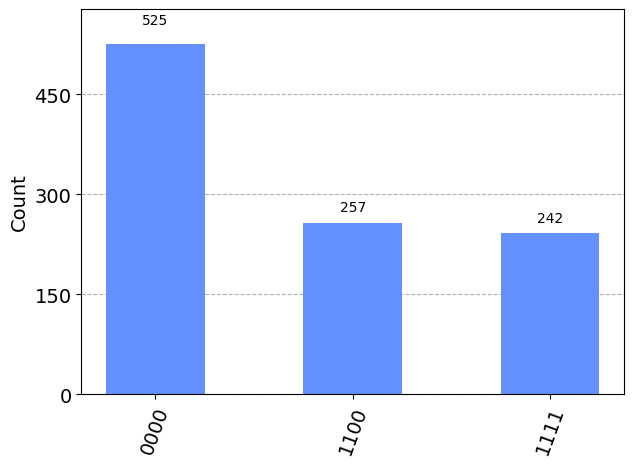

In [7]:
# plotting the histogram for seeing the distribution graphically
plot_histogram(result_distribution)

## Running in actual Quantum Computer

In [8]:
# creating the provider object
provider = IBMProvider()

In [9]:
# seeing the available backends
pprint(provider.backends())

[<IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]


In [10]:
# selecting a quantum computer
qcomp = provider.get_backend('ibm_brisbane')

In [11]:
# executing the circuit in the real quantum computer
tqc_real_quantum = transpile(circuit, qcomp)
job = qcomp.run(tqc_real_quantum)

In [14]:
# monitoring the status
job_monitor(job)

Job Status: job has successfully run


In [15]:
# get the results
quantum_result = job.result()
quantum_result_counts = quantum_result.get_counts()
print(quantum_result_counts)

{'0001': 11, '0110': 1, '0111': 2, '0011': 26, '1011': 12, '1100': 982, '0000': 1885, '1000': 13, '0100': 28, '1111': 956, '0010': 36, '1110': 21, '1101': 27}


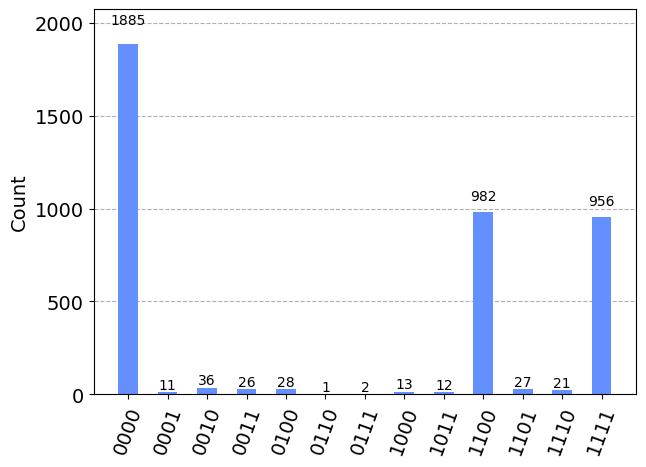

In [16]:
# plot histogram of the result
plot_histogram(quantum_result_counts)

In [20]:
# filter result for less counts (<50)
filtered_results = {output:count for output,count in quantum_result_counts.items() if count > 50}
filtered_results

{'1100': 982, '0000': 1885, '1111': 956}

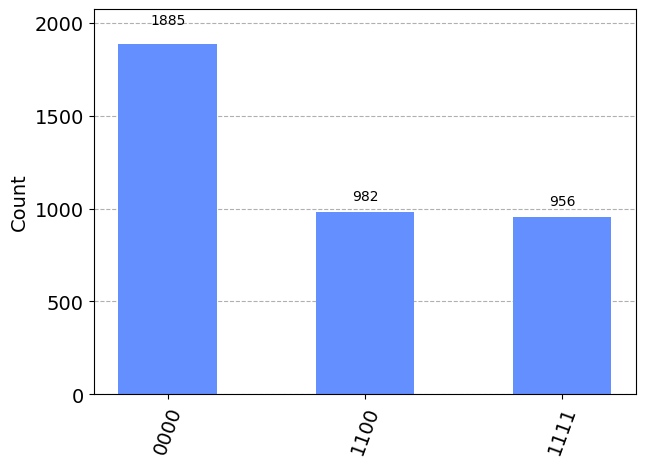

In [21]:
# display the filtered result
plot_histogram(filtered_results)